In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
df = pd.read_csv('insurance.csv',index_col=None)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
age_mean = df['age'].mean()
age_mean

39.20702541106129

In [7]:
age_min=df['age'].min()
age_max = df['age'].max()

print('Age min: {0}, Age max: {1}'.format(age_min,age_max))

Age min: 18, Age max: 64


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

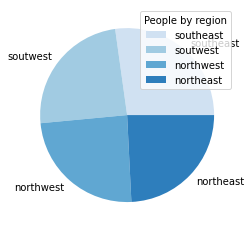

In [10]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(df['region'].value_counts())))
y = np.array(df['region'].value_counts())
labels = ['southeast','soutwest','northwest','northeast']
plt.pie(y,colors=colors,labels=labels)
plt.legend(title='People by region',)
plt.show() 

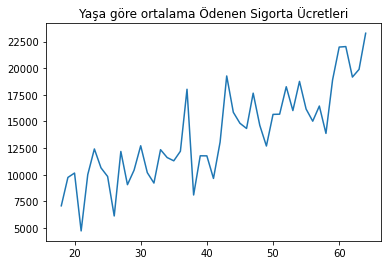

In [11]:
charges_over_age = df.groupby(df['age'])['charges'].mean()
plt.plot(charges_over_age)
plt.title('Yaşa göre ortalama Ödenen Sigorta Ücretleri')
plt.show()

In [12]:
smoking_rows = df.loc[df.smoker =='yes']
smoking_rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


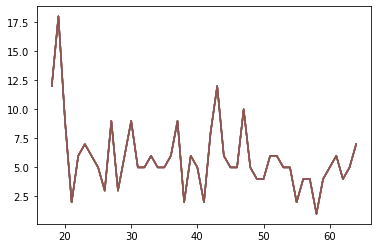

In [13]:
smoker_over_age = smoking_rows.groupby(smoking_rows.age).count()
plt.plot(smoker_over_age)
plt.show()

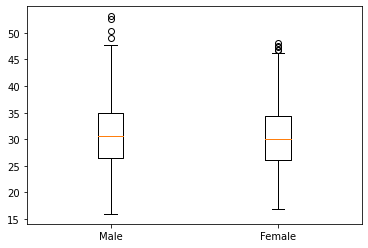

In [14]:
bmi_with_sex = pd.DataFrame(df.groupby([df.sex,df.age])['bmi'].mean())
#print(bmi_with_sex)
#print(bmi_male,bmi_female)
bmi_male = df.loc[df.sex=='male'][['age','bmi']]
bmi_female = df.loc[df.sex == 'female'][['age','bmi']]

plt.boxplot(x=[bmi_male.bmi,bmi_female.bmi])
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()
## İki cinsiyetin de ortalama bmi'ları çok yakın. Male olanlar da kilolu olanların
## kiloları Female olanlardan fazla gibi gözüküyor

In [15]:
pd.concat([bmi_male.bmi.describe(),bmi_female.bmi.describe()],keys=['Male','Female'])

Male    count    676.000000
        mean      30.943129
        std        6.140435
        min       15.960000
        25%       26.410000
        50%       30.687500
        75%       34.992500
        max       53.130000
Female  count    662.000000
        mean      30.377749
        std        6.046023
        min       16.815000
        25%       26.125000
        50%       30.107500
        75%       34.313750
        max       48.070000
Name: bmi, dtype: float64

/Users/osmanguler/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

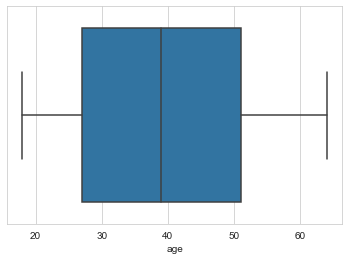

In [16]:
sns.set_style('whitegrid')
sns.boxplot(df.age)

In [17]:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

/Users/osmanguler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


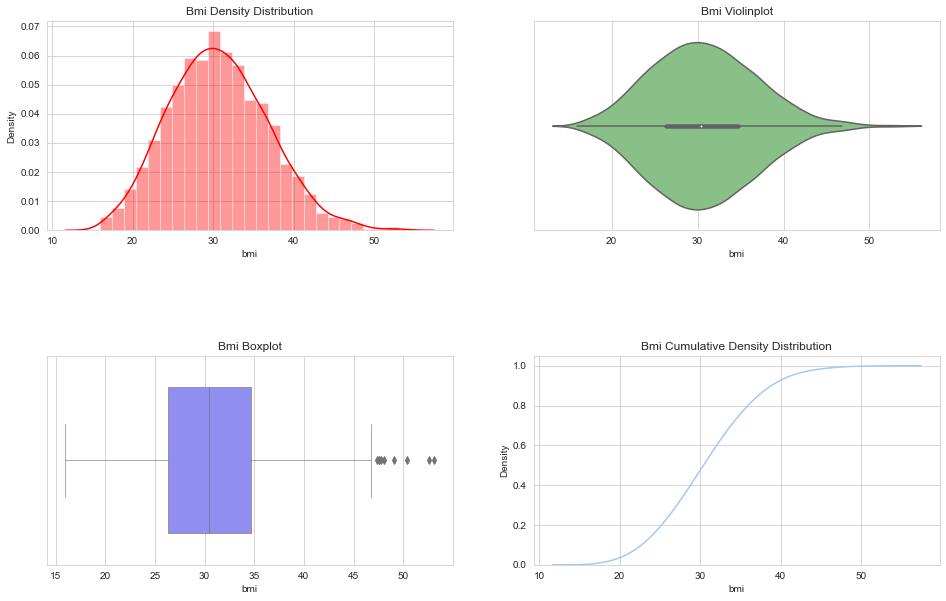

In [18]:
summary('bmi')

<AxesSubplot:ylabel='Frequency'>

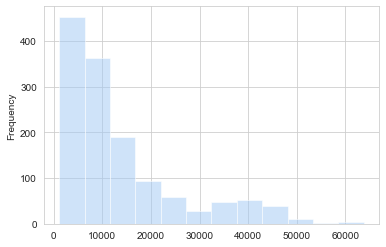

In [19]:
df.charges.plot.hist(bins=12, alpha=0.5)

In [20]:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

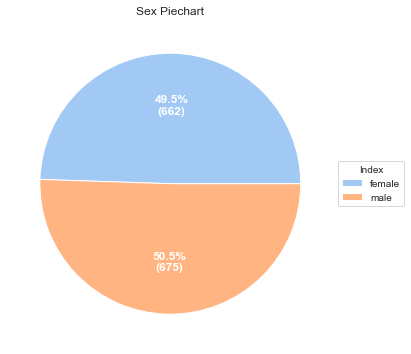

In [21]:
pie_chart('sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

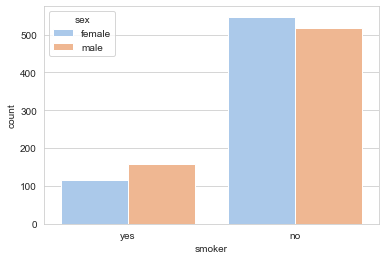

In [22]:
sns.countplot(x = 'smoker', hue = 'sex', data = df)

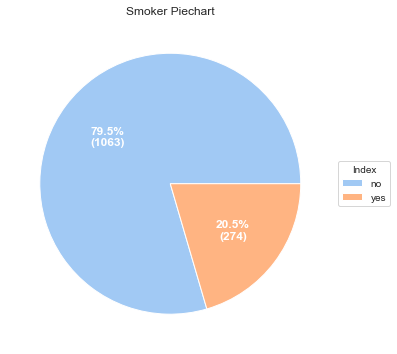

In [23]:
pie_chart('smoker')

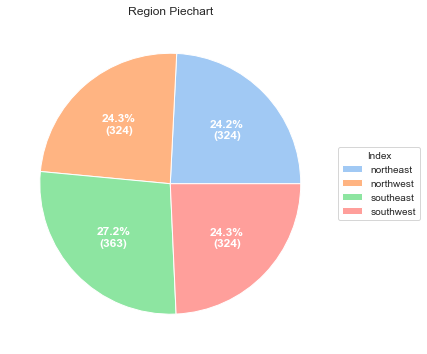

In [24]:
pie_chart('region')

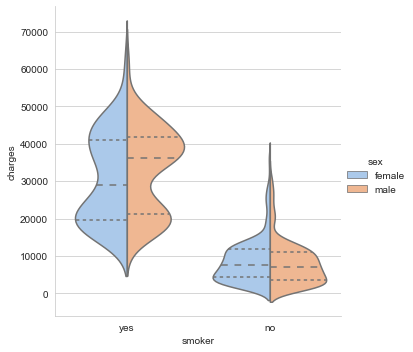

In [25]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=df);

/Users/osmanguler/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='charges'>

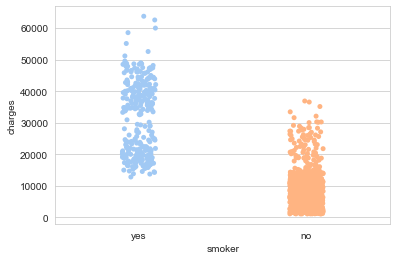

In [26]:
sns.stripplot(df['smoker'], df['charges'])

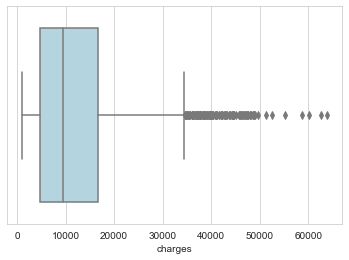

In [27]:
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

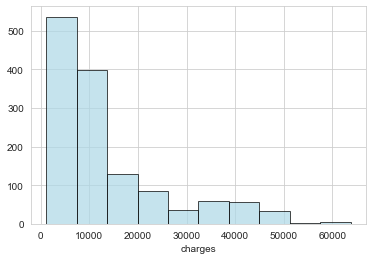

In [28]:
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

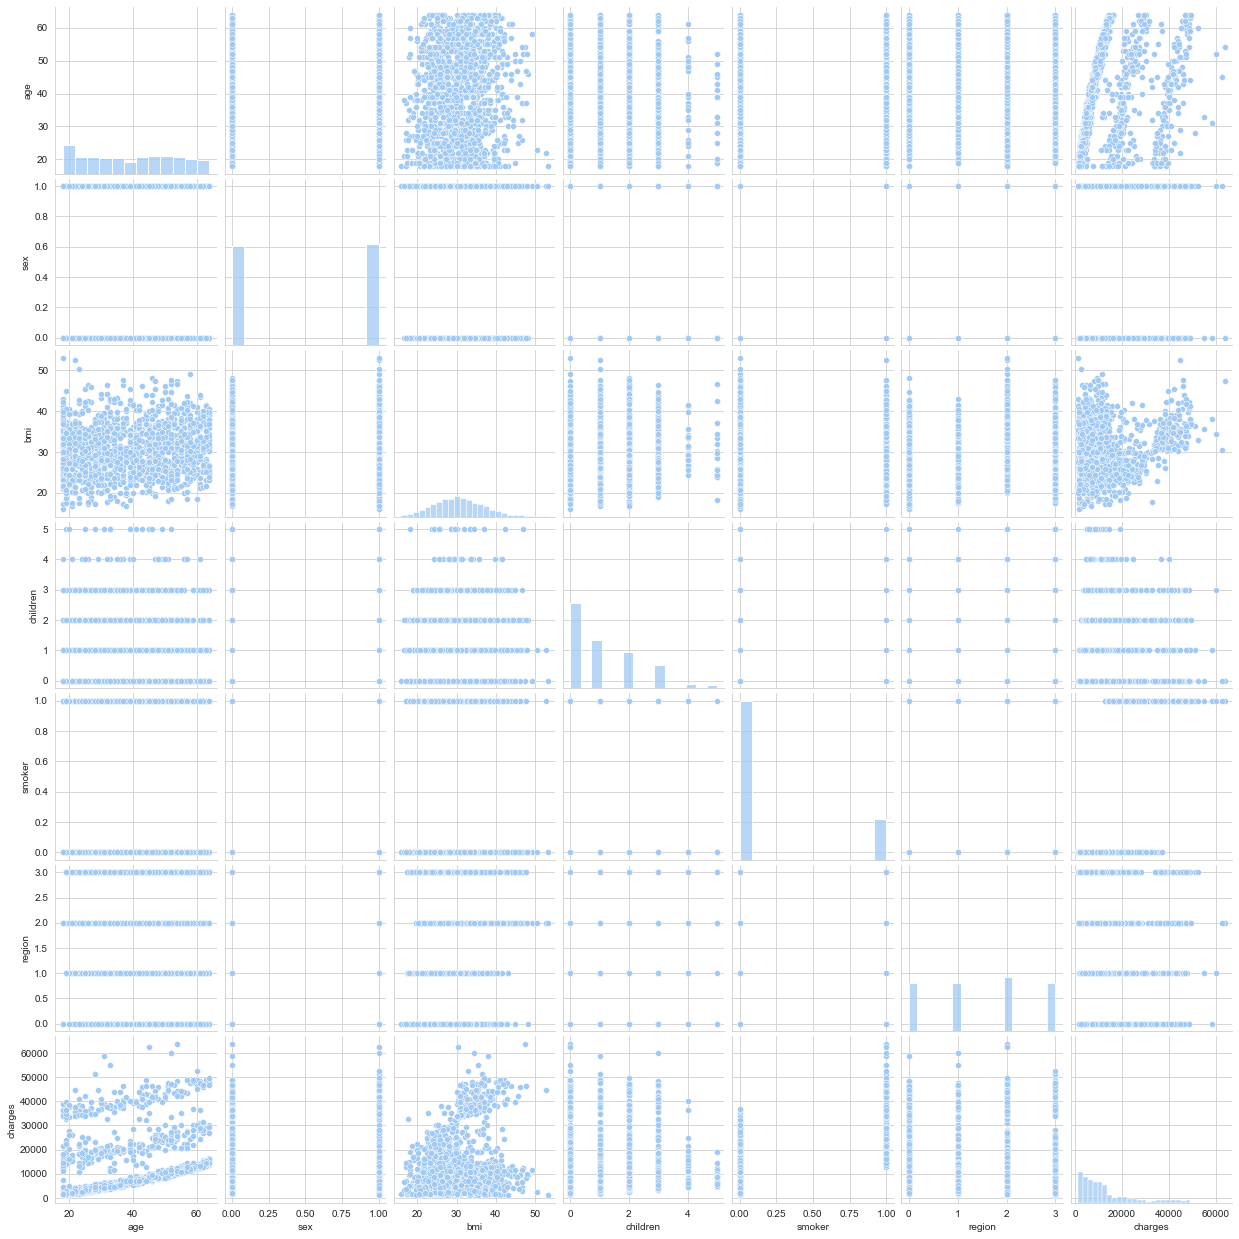

In [29]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [30]:
smoker_by_region = df.loc[df.smoker=='yes'].groupby(['smoker','region']).count().reset_index().sort_values(by=['age'])
smoker_by_region.rename(columns={'age':'Smoker Number'},inplace=True)
smoker_by_region = smoker_by_region[['region','Smoker Number']]
smoker_by_region

,region,Smoker Number
1,northwest,58
3,southwest,58
0,northeast,67
2,southeast,91


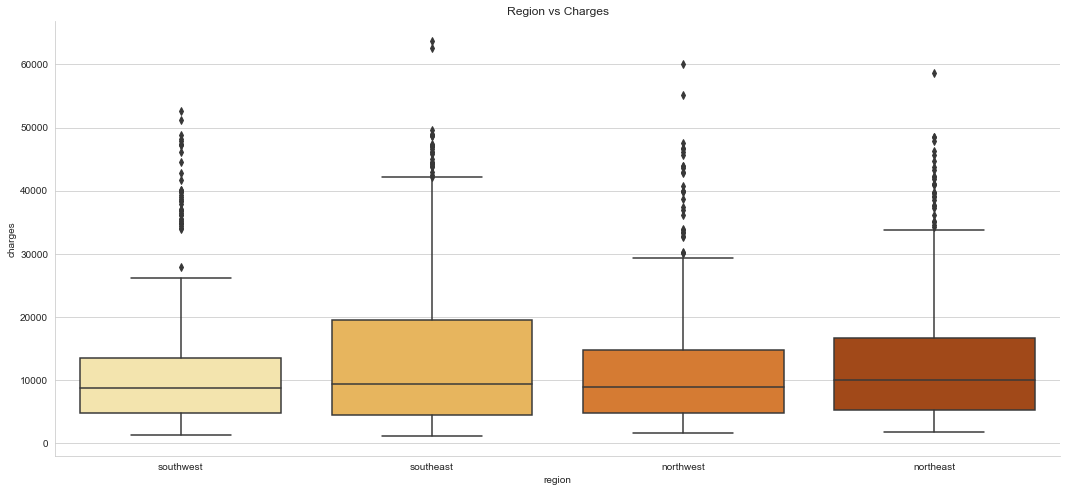

In [31]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = df, palette ='YlOrBr')
plt.title('Region vs Charges')
sns.despine()

In [32]:
def label_bmi(x):
    if(x <=18.5):
        return 'thin'
    elif(x> 18.5 and x<=24.999):
        return 'normal'
    elif(x>25 and x<=29.999):
        return 'overweight'
    elif(x>30 and x<=34.999):
        return 'obesity'
    else:
        return 'severe_obesity'

In [33]:
df['bmi_label'] = df.bmi.apply(lambda x: label_bmi(x))

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_label
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [35]:
df.bmi_label.value_counts()

obesity           389
overweight        384
severe_obesity    320
normal            224
thin               21
Name: bmi_label, dtype: int64

<AxesSubplot:xlabel='bmi_label', ylabel='charges'>

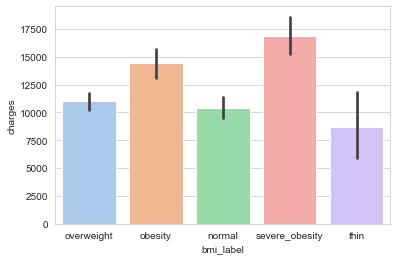

In [36]:
sns.barplot(x='bmi_label', y='charges', data=df)

In [37]:
def label_charges(x):
    if(x <=19999.999):
        return 'low'
    elif(x> 19999.999 and x<=39999.999):
        return 'normal'
    else:
        return 'high'
    

In [38]:
df['risk_label'] = df.charges.apply(lambda x: label_charges(x))

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_label,risk_label
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,low
1,18,male,33.770,1,no,southeast,1725.55230,obesity,low
2,28,male,33.000,3,no,southeast,4449.46200,obesity,low
3,33,male,22.705,0,no,northwest,21984.47061,normal,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight,low


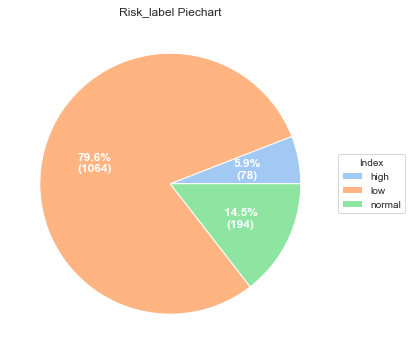

In [40]:
pie_chart('risk_label')

<AxesSubplot:xlabel='risk_label', ylabel='charges'>

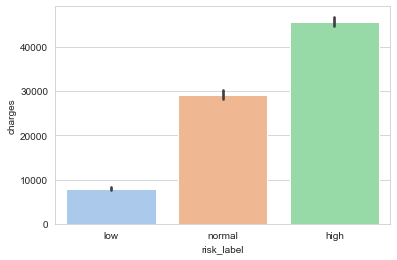

In [41]:
sns.barplot(x='risk_label', y='charges', data=df)

In [42]:
def label_age(x):
    if(x <=30):
        return 'youth'
    elif(x> 30 and x<=50):
        return 'middle age'
    else:
        return 'old'

In [43]:
df['age_label'] = df.age.apply(lambda x: label_age(x))

In [44]:
df.age_label.value_counts()

middle age    538
youth         444
old           356
Name: age_label, dtype: int64

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_label,risk_label,age_label
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,low,youth
1,18,male,33.770,1,no,southeast,1725.55230,obesity,low,youth
2,28,male,33.000,3,no,southeast,4449.46200,obesity,low,youth
3,33,male,22.705,0,no,northwest,21984.47061,normal,normal,middle age
4,32,male,28.880,0,no,northwest,3866.85520,overweight,low,middle age


<AxesSubplot:xlabel='age_label', ylabel='charges'>

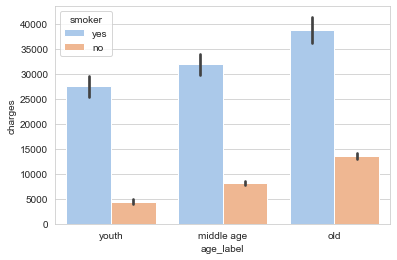

In [46]:
sns.barplot(x='age_label', y='charges', hue='smoker', data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

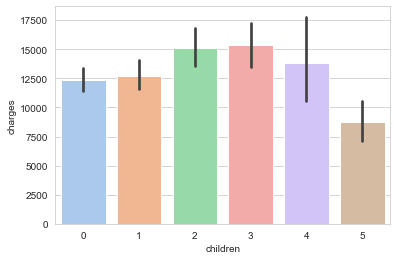

In [47]:
sns.barplot(x='children', y='charges', data=df)

<AxesSubplot:xlabel='age_label', ylabel='charges'>

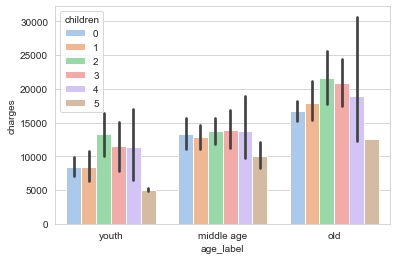

In [48]:
sns.barplot(x='age_label', y='charges', hue='children', data=df)

In [49]:
ages = {"youth": 0, "middle age": 1, "old": 2}
data = [df]
for dataset in data:
    dataset['age_label'] = dataset['age_label'].map(ages)
    
    
    

In [50]:
risks = {"low": 0, "normal": 1, "high": 2}
data = [df]
for dataset in data:
    dataset['risk_label'] = dataset['risk_label'].map(risks)

In [51]:
bmis = {"thin": 0, "normal": 1, "overweight": 2, "obesity":3, "severe_obesity":4}
data = [df]
for dataset in data:
    dataset['bmi_label'] = dataset['bmi_label'].map(bmis)

In [52]:
df['sex'] = df.sex.apply(lambda x: 1 if(x.lower()=='male') else 0)

<AxesSubplot:xlabel='region', ylabel='charges'>

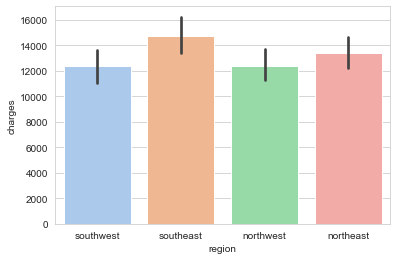

In [53]:
sns.barplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

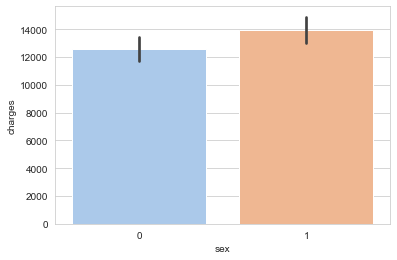

In [54]:
sns.barplot(x='sex', y='charges', data=df)

In [55]:
regions = {"southwest": 0, "southeast": 1, "northwest":2, "northeast":3}
data = [df]
for dataset in data:
    dataset['region'] = dataset['region'].map(regions)

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_label,risk_label,age_label
0,19,0,27.900,0,yes,0,16884.92400,2,0,0
1,18,1,33.770,1,no,1,1725.55230,3,0,0
2,28,1,33.000,3,no,1,4449.46200,3,0,0
3,33,1,22.705,0,no,2,21984.47061,1,1,1
4,32,1,28.880,0,no,2,3866.85520,2,0,1


In [57]:
df['smoker'] = df.smoker.apply(lambda x : 1 if(x.lower()=='yes') else 0)

In [58]:
df = df.drop(['age'], axis=1)
df = df.drop(['bmi'], axis=1)
df = df.drop(['charges'], axis=1)

In [59]:
df.head()

,sex,children,smoker,region,bmi_label,risk_label,age_label
0,0,0,1,0,2,0,0
1,1,1,0,1,3,0,0
2,1,3,0,1,3,0,0
3,1,0,0,2,1,1,1
4,1,0,0,2,2,0,1


<AxesSubplot:>

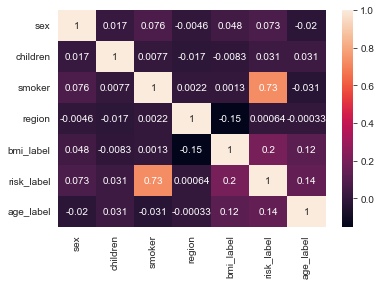

In [60]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [61]:
from sklearn.model_selection import train_test_split
y = df.risk_label
df.drop('risk_label', axis=1, inplace=True)
X = df

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [65]:
print(acc_sgd)

86.5


In [66]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [67]:
print(acc_random_forest)

95.2


In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [69]:
print(acc_log)

90.51


In [70]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [71]:
print(acc_knn)

94.64


In [72]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [73]:
print(acc_gaussian)

82.03


In [74]:
perceptron = Perceptron(max_iter=200)
perceptron.fit(X_train, y_train)


Y_pred = perceptron.predict(X_test)


acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [75]:
print(acc_perceptron)

88.06


In [76]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

/Users/osmanguler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [77]:
print(acc_linear_svc)

89.06


In [78]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [79]:
print(acc_decision_tree)

95.2


In [80]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
95.20,Random Forest
95.20,Decision Tree
94.64,KNN
90.51,Logistic Regression
89.06,Support Vector Machines
88.06,Perceptron
86.50,Stochastic Gradient Decent
82.03,Naive Bayes


In [81]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9        0.92222222 0.9        0.86666667 0.88888889 0.88888889
 0.86516854 0.88764045 0.92134831 0.91011236]
Mean: 0.8950936329588016
Standard Deviation: 0.018801933335259764


In [82]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
smoker,0.470
bmi_label,0.171
age_label,0.130
children,0.105
region,0.094
sex,0.029


<AxesSubplot:xlabel='feature'>

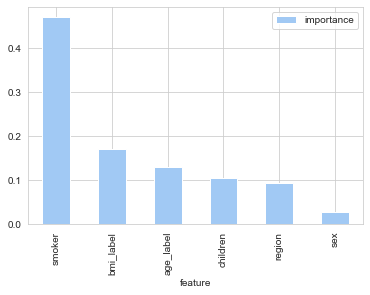

In [83]:
importances.plot.bar()

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[682,  30,   0],
       [ 49,  74,   9],
       [  0,  13,  39]])